In [ ]:
%matplotlib inline

# Sigmond et al 2020 Supplementary figures for Fig. 4 (Salinity and Density)

-Input: SO/RHO_top800 (lon,lat,year) [from 3_calc-top800+plot] 
-Output: SO/RHO_top800_na/sa (year) 



In [2]:
basedir='/home/rms101/SCRIPTS/amoc_stab/'
import sys
sys.path.append(basedir + 'MODS')
import os
import cmipdata as cd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt # for basic plotting
import rms_plots as rpl
import rms_utils as rut
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

################settings
#rundir='/HOME/rms/SCRIPTS/6_OTHER/6PARIS-STAB/4SO/';os.chdir(rundir)
#mpl.style.reload_library()
#plt.style.use('rms_paper')

In [3]:
#calc and read data
rundir='/home/rms101/SCRIPTS/amoc_stab/FIG4_SO+RHO/';os.chdir(rundir)
srcdir_base='/space/hall3/sitestore/eccc/crd/ccrn/users/rms101/DATA/' 
datadir=srcdir_base+'/amoc_stab_post'
do_calc=True

if do_calc:
    #######Salinity##########
    os.chdir('{}/DATA_so'.format(datadir))
    ens_pic_top8=cd.mkensemble('top8_am_*_piControl*',prefix='top8_am_')
    ens_his_top8=cd.mkensemble('top8_am_*_historical-r*',prefix='top8_am_')
    ens_15c_top8=cd.mkensemble('top8_am_*_lowwarming15*',prefix='top8_am_')
    ens_20c_top8=cd.mkensemble('top8_am_*_lowwarming20*',prefix='top8_am_')
    ens_30c_top8=cd.mkensemble('top8_am_*_lowwarming30*',prefix='top8_am_')    

    # North Atlantic [year]
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,50,60 -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}' 
    ens_pic_top8_na_so=cd.my_operator(ens_pic_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_his_top8_na_so=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_15c_top8_na_so=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_20c_top8_na_so=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_30c_top8_na_so=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    # South Atlantic [year]
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,-30,-20 -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}' 
    ens_pic_top8_sa_so=cd.my_operator(ens_pic_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_his_top8_sa_so=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_15c_top8_sa_so=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_20c_top8_sa_so=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_30c_top8_sa_so=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year

    #######rho0##########
    os.chdir('{}/DATA_rho0'.format(datadir))
    # make ensemble of top 800m (lon,lat,year) timeseries [lon,lat,year] 
    ens_pic_top8=cd.mkensemble('top8_am_*_piControl*',prefix='top8_am_')
    ens_his_top8=cd.mkensemble('top8_am_*_historical-r*',prefix='top8_am_')
    ens_15c_top8=cd.mkensemble('top8_am_*_lowwarming15*',prefix='top8_am_')
    ens_20c_top8=cd.mkensemble('top8_am_*_lowwarming20*',prefix='top8_am_')
    ens_30c_top8=cd.mkensemble('top8_am_*_lowwarming30*',prefix='top8_am_')    

    # North Atlantic [year]
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,50,60 -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}' 
    ens_pic_top8_na_rho=cd.my_operator(ens_pic_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_his_top8_na_rho=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_15c_top8_na_rho=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_20c_top8_na_rho=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_30c_top8_na_rho=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    # South Atlantic [year]
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,-30,-20 -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}' 
    ens_pic_top8_sa_rho=cd.my_operator(ens_pic_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_his_top8_sa_rho=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_15c_top8_sa_rho=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_20c_top8_sa_rho=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_30c_top8_sa_rho=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year

    #######rho0t##########
    os.chdir('{}/DATA_rho0t'.format(datadir))
    # make ensemble of top 800m (lon,lat,year) timeseries [lon,lat,year] 
    ens_pic_top8=cd.mkensemble('top8_am_*_piControl*',prefix='top8_am_')
    ens_his_top8=cd.mkensemble('top8_am_*_historical-r*',prefix='top8_am_')
    ens_15c_top8=cd.mkensemble('top8_am_*_lowwarming15*',prefix='top8_am_')
    ens_20c_top8=cd.mkensemble('top8_am_*_lowwarming20*',prefix='top8_am_')
    ens_30c_top8=cd.mkensemble('top8_am_*_lowwarming30*',prefix='top8_am_')    

    # North Atlantic [year]
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,50,60 -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}' 
    ens_his_top8_na_rhot=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_15c_top8_na_rhot=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_20c_top8_na_rhot=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_30c_top8_na_rhot=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    # South Atlantic [year]
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,-30,-20 -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}' 
    ens_his_top8_sa_rhot=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_15c_top8_sa_rhot=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_20c_top8_sa_rhot=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_30c_top8_sa_rhot=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    
    #######rho0s##########
    os.chdir('{}/DATA_rho0s'.format(datadir))
    # make ensemble of top 800m (lon,lat,year) timeseries [lon,lat,year] 
    ens_his_top8=cd.mkensemble('top8_am_*_historical-r*',prefix='top8_am_')
    ens_15c_top8=cd.mkensemble('top8_am_*_lowwarming15*',prefix='top8_am_')
    ens_20c_top8=cd.mkensemble('top8_am_*_lowwarming20*',prefix='top8_am_')
    ens_30c_top8=cd.mkensemble('top8_am_*_lowwarming30*',prefix='top8_am_')    

    # North Atlantic [year]
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,50,60 -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}' 
    ens_his_top8_na_rhos=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_15c_top8_na_rhos=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_20c_top8_na_rhos=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    ens_30c_top8_na_rhos=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='na_',delete=False) #lon,lat,year
    # South Atlantic [year]
    my_cdo_str='cdo -fldmean -sellonlatbox,0,360,-30,-20 -ifthen '+rundir+'/atlantic_mask.nc {infile} {outfile}' 
    ens_his_top8_sa_rhos=cd.my_operator(ens_his_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_15c_top8_sa_rhos=cd.my_operator(ens_15c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_20c_top8_sa_rhos=cd.my_operator(ens_20c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year
    ens_30c_top8_sa_rhos=cd.my_operator(ens_30c_top8, my_cdo_str, output_prefix='sa_',delete=False) #lon,lat,year           
else:
    #######Salinity##########
    os.chdir('{}/DATA_so'.format(datadir)) 

    ens_pic_top8_na_so=cd.mkensemble('na_top8_am_*_piControl*',prefix='na_top8_am_')
    ens_his_top8_na_so=cd.mkensemble('na_top8_am_*_historical-r*',prefix='na_top8_am_')
    ens_15c_top8_na_so=cd.mkensemble('na_top8_am_*_lowwarming15*',prefix='na_top8_am_')
    ens_20c_top8_na_so=cd.mkensemble('na_top8_am_*_lowwarming20*',prefix='na_top8_am_')
    ens_30c_top8_na_so=cd.mkensemble('na_top8_am_*_lowwarming30*',prefix='na_top8_am_')   

    ens_pic_top8_sa_so=cd.mkensemble('sa_top8_am_*_piControl*',prefix='sa_top8_am_')
    ens_his_top8_sa_so=cd.mkensemble('sa_top8_am_*_historical-r*',prefix='sa_top8_am_')
    ens_15c_top8_sa_so=cd.mkensemble('sa_top8_am_*_lowwarming15*',prefix='sa_top8_am_')
    ens_20c_top8_sa_so=cd.mkensemble('sa_top8_am_*_lowwarming20*',prefix='sa_top8_am_')
    ens_30c_top8_sa_so=cd.mkensemble('sa_top8_am_*_lowwarming30*',prefix='sa_top8_am_')  

    #######rho0##########
    os.chdir('{}/DATA_rho0'.format(datadir)) 

    ens_pic_top8_na_rho=cd.mkensemble('na_top8_am_*_piControl*',prefix='na_top8_am_')
    ens_his_top8_na_rho=cd.mkensemble('na_top8_am_*_historical-r*',prefix='na_top8_am_')
    ens_15c_top8_na_rho=cd.mkensemble('na_top8_am_*_lowwarming15*',prefix='na_top8_am_')
    ens_20c_top8_na_rho=cd.mkensemble('na_top8_am_*_lowwarming20*',prefix='na_top8_am_')
    ens_30c_top8_na_rho=cd.mkensemble('na_top8_am_*_lowwarming30*',prefix='na_top8_am_')   

    ens_pic_top8_sa_rho=cd.mkensemble('sa_top8_am_*_piControl*',prefix='sa_top8_am_')
    ens_his_top8_sa_rho=cd.mkensemble('sa_top8_am_*_historical-r*',prefix='sa_top8_am_')
    ens_15c_top8_sa_rho=cd.mkensemble('sa_top8_am_*_lowwarming15*',prefix='sa_top8_am_')
    ens_20c_top8_sa_rho=cd.mkensemble('sa_top8_am_*_lowwarming20*',prefix='sa_top8_am_')
    ens_30c_top8_sa_rho=cd.mkensemble('sa_top8_am_*_lowwarming30*',prefix='sa_top8_am_')  

    #######rho0t##########
    os.chdir('{}/DATA_rho0t'.format(datadir)) 

    ens_his_top8_na_rhot=cd.mkensemble('na_top8_am_*_historical-r*',prefix='na_top8_am_')
    ens_15c_top8_na_rhot=cd.mkensemble('na_top8_am_*_lowwarming15*',prefix='na_top8_am_')
    ens_20c_top8_na_rhot=cd.mkensemble('na_top8_am_*_lowwarming20*',prefix='na_top8_am_')
    ens_30c_top8_na_rhot=cd.mkensemble('na_top8_am_*_lowwarming30*',prefix='na_top8_am_')   

    ens_his_top8_sa_rhot=cd.mkensemble('sa_top8_am_*_historical-r*',prefix='sa_top8_am_')
    ens_15c_top8_sa_rhot=cd.mkensemble('sa_top8_am_*_lowwarming15*',prefix='sa_top8_am_')
    ens_20c_top8_sa_rhot=cd.mkensemble('sa_top8_am_*_lowwarming20*',prefix='sa_top8_am_')
    ens_30c_top8_sa_rhot=cd.mkensemble('sa_top8_am_*_lowwarming30*',prefix='sa_top8_am_')  

    #######rho0s##########
    os.chdir('{}/DATA_rho0s'.format(datadir)) 

    ens_his_top8_na_rhos=cd.mkensemble('na_top8_am_*_historical-r*',prefix='na_top8_am_')
    ens_15c_top8_na_rhos=cd.mkensemble('na_top8_am_*_lowwarming15*',prefix='na_top8_am_')
    ens_20c_top8_na_rhos=cd.mkensemble('na_top8_am_*_lowwarming20*',prefix='na_top8_am_')
    ens_30c_top8_na_rhos=cd.mkensemble('na_top8_am_*_lowwarming30*',prefix='na_top8_am_')   

    ens_his_top8_sa_rhos=cd.mkensemble('sa_top8_am_*_historical-r*',prefix='sa_top8_am_')
    ens_15c_top8_sa_rhos=cd.mkensemble('sa_top8_am_*_lowwarming15*',prefix='sa_top8_am_')
    ens_20c_top8_sa_rhos=cd.mkensemble('sa_top8_am_*_lowwarming20*',prefix='sa_top8_am_')
    ens_30c_top8_sa_rhos=cd.mkensemble('sa_top8_am_*_lowwarming30*',prefix='sa_top8_am_')  

    
    
os.chdir('{}/DATA_so'.format(datadir)) 
so_pic_na=cd.loadfiles(ens_pic_top8_na_so,'so')['data'].squeeze(); 
so_his_na=cd.loadfiles(ens_his_top8_na_so,'so')['data'].squeeze(); 
so_15c_na=cd.loadfiles(ens_15c_top8_na_so,'so')['data'].squeeze(); 
so_20c_na=cd.loadfiles(ens_20c_top8_na_so,'so')['data'].squeeze(); 
so_30c_na=cd.loadfiles(ens_30c_top8_na_so,'so')['data'].squeeze(); 

so_pic_sa=cd.loadfiles(ens_pic_top8_sa_so,'so')['data'].squeeze(); 
so_his_sa=cd.loadfiles(ens_his_top8_sa_so,'so')['data'].squeeze(); 
so_15c_sa=cd.loadfiles(ens_15c_top8_sa_so,'so')['data'].squeeze(); 
so_20c_sa=cd.loadfiles(ens_20c_top8_sa_so,'so')['data'].squeeze(); 
so_30c_sa=cd.loadfiles(ens_30c_top8_sa_so,'so')['data'].squeeze(); 


os.chdir('{}/DATA_rho0/'.format(datadir)) 

rho_pic_na=cd.loadfiles(ens_pic_top8_na_rho,'rho0')['data'].squeeze(); 
rho_his_na=cd.loadfiles(ens_his_top8_na_rho,'rho0')['data'].squeeze(); 
rho_15c_na=cd.loadfiles(ens_15c_top8_na_rho,'rho0')['data'].squeeze(); 
rho_20c_na=cd.loadfiles(ens_20c_top8_na_rho,'rho0')['data'].squeeze(); 
rho_30c_na=cd.loadfiles(ens_30c_top8_na_rho,'rho0')['data'].squeeze(); 

rho_pic_sa=cd.loadfiles(ens_pic_top8_sa_rho,'rho0')['data'].squeeze(); 
rho_his_sa=cd.loadfiles(ens_his_top8_sa_rho,'rho0')['data'].squeeze(); 
rho_15c_sa=cd.loadfiles(ens_15c_top8_sa_rho,'rho0')['data'].squeeze(); 
rho_20c_sa=cd.loadfiles(ens_20c_top8_sa_rho,'rho0')['data'].squeeze(); 
rho_30c_sa=cd.loadfiles(ens_30c_top8_sa_rho,'rho0')['data'].squeeze(); 

os.chdir('{}/DATA_rho0t/'.format(datadir)) 

rhot_his_na=cd.loadfiles(ens_his_top8_na_rhot,'rho0t')['data'].squeeze(); 
rhot_15c_na=cd.loadfiles(ens_15c_top8_na_rhot,'rho0t')['data'].squeeze(); 
rhot_20c_na=cd.loadfiles(ens_20c_top8_na_rhot,'rho0t')['data'].squeeze(); 
rhot_30c_na=cd.loadfiles(ens_30c_top8_na_rhot,'rho0t')['data'].squeeze(); 

rhot_his_sa=cd.loadfiles(ens_his_top8_sa_rhot,'rho0t')['data'].squeeze(); 
rhot_15c_sa=cd.loadfiles(ens_15c_top8_sa_rhot,'rho0t')['data'].squeeze(); 
rhot_20c_sa=cd.loadfiles(ens_20c_top8_sa_rhot,'rho0t')['data'].squeeze(); 
rhot_30c_sa=cd.loadfiles(ens_30c_top8_sa_rhot,'rho0t')['data'].squeeze(); 

os.chdir('{}/DATA_rho0s/'.format(datadir)) 

rhos_his_na=cd.loadfiles(ens_his_top8_na_rhos,'rho0s')['data'].squeeze(); 
rhos_15c_na=cd.loadfiles(ens_15c_top8_na_rhos,'rho0s')['data'].squeeze(); 
rhos_20c_na=cd.loadfiles(ens_20c_top8_na_rhos,'rho0s')['data'].squeeze(); 
rhos_30c_na=cd.loadfiles(ens_30c_top8_na_rhos,'rho0s')['data'].squeeze(); 

rhos_his_sa=cd.loadfiles(ens_his_top8_sa_rhos,'rho0s')['data'].squeeze(); 
rhos_15c_sa=cd.loadfiles(ens_15c_top8_sa_rhos,'rho0s')['data'].squeeze(); 
rhos_20c_sa=cd.loadfiles(ens_20c_top8_sa_rhos,'rho0s')['data'].squeeze(); 
rhos_30c_sa=cd.loadfiles(ens_30c_top8_sa_rhos,'rho0s')['data'].squeeze(); 


os.chdir(rundir)

This ensemble contains:
1 variables
1 models
1 experiments
1 realizations
1 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
1 realizations
1 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.fulldetails() 

This ensemble contains:
1 variables
1 models
1 experiments
5 realizations
5 ncfiles

 For more details use ens.

In [4]:
#Calculate responses
###so
so_piclim_na=np.mean(so_pic_na) #constanst
so_his_na_r=so_his_na-so_piclim_na
so_15c_na_r=so_15c_na-so_piclim_na
so_20c_na_r=so_20c_na-so_piclim_na
so_30c_na_r=so_30c_na-so_piclim_na

so_piclim_sa=np.mean(so_pic_sa) #constanst
so_his_sa_r=so_his_sa-so_piclim_sa
so_15c_sa_r=so_15c_sa-so_piclim_sa
so_20c_sa_r=so_20c_sa-so_piclim_sa
so_30c_sa_r=so_30c_sa-so_piclim_sa

###rho
rho_piclim_na=np.mean(rho_pic_na) #constanst
rho_his_na_r=rho_his_na-rho_piclim_na
rho_15c_na_r=rho_15c_na-rho_piclim_na
rho_20c_na_r=rho_20c_na-rho_piclim_na
rho_30c_na_r=rho_30c_na-rho_piclim_na

rho_piclim_sa=np.mean(rho_pic_sa) #constanst
rho_his_sa_r=rho_his_sa-rho_piclim_sa
rho_15c_sa_r=rho_15c_sa-rho_piclim_sa
rho_20c_sa_r=rho_20c_sa-rho_piclim_sa
rho_30c_sa_r=rho_30c_sa-rho_piclim_sa

###rhot
rhot_his_na_r=rhot_his_na-rho_piclim_na
rhot_15c_na_r=rhot_15c_na-rho_piclim_na
rhot_20c_na_r=rhot_20c_na-rho_piclim_na
rhot_30c_na_r=rhot_30c_na-rho_piclim_na

rhot_his_sa_r=rhot_his_sa-rho_piclim_sa
rhot_15c_sa_r=rhot_15c_sa-rho_piclim_sa
rhot_20c_sa_r=rhot_20c_sa-rho_piclim_sa
rhot_30c_sa_r=rhot_30c_sa-rho_piclim_sa

###rhos
rhos_his_na_r=rhos_his_na-rho_piclim_na
rhos_15c_na_r=rhos_15c_na-rho_piclim_na
rhos_20c_na_r=rhos_20c_na-rho_piclim_na
rhos_30c_na_r=rhos_30c_na-rho_piclim_na

rhos_his_sa_r=rhos_his_sa-rho_piclim_sa
rhos_15c_sa_r=rhos_15c_sa-rho_piclim_sa
rhos_20c_sa_r=rhos_20c_sa-rho_piclim_sa
rhos_30c_sa_r=rhos_30c_sa-rho_piclim_sa

In [8]:
#Plot functions

def plot_x(ax,years,x,color,linewidth,linestyle='-'):
  kwargs={'linewidth': linewidth, 'color': color,'linestyle': linestyle}
  ax.plot(years,np.mean(x,axis=0),**kwargs)                                    
  # range
  kwargs={'color':color, 'alpha': 0.15, 'linewidth': 0}
  ax.fill_between(years,np.min(x,axis=0), np.max(x,axis=0),**kwargs)

def plot_x2(ax,years,x,color,linewidth,linestyle='-'):
  kwargs={'linewidth': linewidth, 'color': color,'linestyle': linestyle}
  ax.plot(years,np.mean(x,axis=0),**kwargs)                                    
  # range
  #kwargs={'color':color, 'alpha': 0.15, 'linewidth': 0}
  #ax.fill_between(years,np.min(x,axis=0), np.max(x,axis=0),**kwargs)


def set_xaxis1 (ax):
  ax.set_xlim([1950, 2100]) 
  ax.set_xticks(np.arange(1950,2125,25))
  ax.xaxis.set_major_locator(MultipleLocator(50))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 

def set_xaxis2 (ax):
  ax.set_xlim([2100, 2600]) 
  ax.set_xticks=np.arange(2200,2700,100) 
  ax.xaxis.set_major_locator(MultipleLocator(100))
  ax.xaxis.set_minor_locator(MultipleLocator(25)) 

####### years    
years_his=np.arange(1950,2060+1)
years_15c=np.arange(2021,2600+1)
years_20c=np.arange(2036,2600+1)
years_30c=np.arange(2061,2600+1)

## Salinity plot


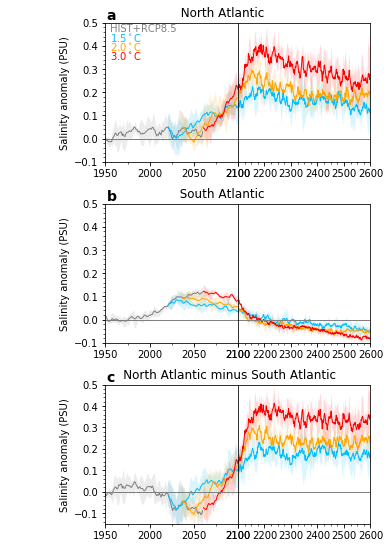

In [6]:
fig = plt.figure(constrained_layout=False,figsize=(8,12))
gs1 = gridspec.GridSpec(nrows=3, ncols=2, left=0.02, right=0.48,
                        wspace=0,hspace=0.3,bottom=0.3)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, 0])
ax4 = fig.add_subplot(gs1[1, 1])
ax5 = fig.add_subplot(gs1[2, 0])
ax6 = fig.add_subplot(gs1[2, 1])

so_his_na_r=so_his_na_r[:,0:rut.find_nearest(years_his,2060)+1]
so_his_sa_r=so_his_sa_r[:,0:rut.find_nearest(years_his,2060)+1]

####### a) North Atlantic    

#col1:1950-2100
ax=ax1
set_xaxis1(ax)
ax.set_ylim([-0.1, 0.5])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02)) 
plot_x(ax,years_his,so_his_na_r,'gray',1)
plot_x(ax,years_15c,so_15c_na_r,'deepskyblue',1)
plot_x(ax,years_20c,so_20c_na_r,'orange',1)
plot_x(ax,years_30c,so_30c_na_r,'red',1)

ax.set_ylabel('Salinity anomaly (PSU)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)

##legend##
ax.text(1955,0.46,'HIST+RCP8.5',color= 'gray')
ax.text(1955,0.42,'1.5$^\circ$C',color= 'deepskyblue')
ax.text(1955,0.38,'2.0$^\circ$C',color= 'orange')
ax.text(1955,0.34,'3.0$^\circ$C',color= 'red')

rpl.add_title(ax1,'                          North Atlantic','a')
#col2:2100-2600
ax=ax2
set_xaxis2(ax)
ax.set_ylim([-0.1, 0.5])
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)
plot_x(ax,years_his,so_his_na_r,'gray',1)
plot_x(ax,years_15c,so_15c_na_r,'deepskyblue',1)
plot_x(ax,years_20c,so_20c_na_r,'orange',1)
plot_x(ax,years_30c,so_30c_na_r,'red',1)
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)

####### b) South Atlantic    
#col1:1950-2100
ax=ax3
set_xaxis1(ax)
ax.set_ylim([-0.1, 0.5])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02)) 
plot_x(ax,years_his,so_his_sa_r,'gray',1)
plot_x(ax,years_15c,so_15c_sa_r,'deepskyblue',1)
plot_x(ax,years_20c,so_20c_sa_r,'orange',1)
plot_x(ax,years_30c,so_30c_sa_r,'red',1)

ax.set_ylabel('Salinity anomaly (PSU)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
rpl.add_title(ax3,'                          South Atlantic','b')

#col2:2100-2600
ax=ax4
set_xaxis2(ax)
ax.set_ylim([-0.1, 0.5])
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)
plot_x(ax,years_his,so_his_sa_r,'gray',1)
plot_x(ax,years_15c,so_15c_sa_r,'deepskyblue',1)
plot_x(ax,years_20c,so_20c_sa_r,'orange',1)
plot_x(ax,years_30c,so_30c_sa_r,'red',1)
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)

####### c) North minus South Atlantic    
#col1:1950-2100
ax=ax5
set_xaxis1(ax)
ax.set_ylim([-0.15, 0.5])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02)) 

plot_x(ax,years_his,so_his_na_r-so_his_sa_r,'gray',1)
plot_x(ax,years_15c,so_15c_na_r-so_15c_sa_r,'deepskyblue',1)
plot_x(ax,years_20c,so_20c_na_r-so_20c_sa_r,'orange',1)
plot_x(ax,years_30c,so_30c_na_r-so_30c_sa_r,'red',1)

ax.set_ylabel('Salinity anomaly (PSU)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
rpl.add_title(ax5,'                              North Atlantic minus South Atlantic','c')


#col2:2100-2600
ax=ax6
set_xaxis2(ax)
ax.set_ylim([-0.15, 0.5])
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)
plot_x(ax,years_his,so_his_na_r-so_his_sa_r,'gray',1)
plot_x(ax,years_15c,so_15c_na_r-so_15c_sa_r,'deepskyblue',1)
plot_x(ax,years_20c,so_20c_na_r-so_20c_sa_r,'orange',1)
plot_x(ax,years_30c,so_30c_na_r-so_30c_sa_r,'red',1)

ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)

rpl.mysavefig(fig,'PLOTS/so_atlantic_top800_ts.png')

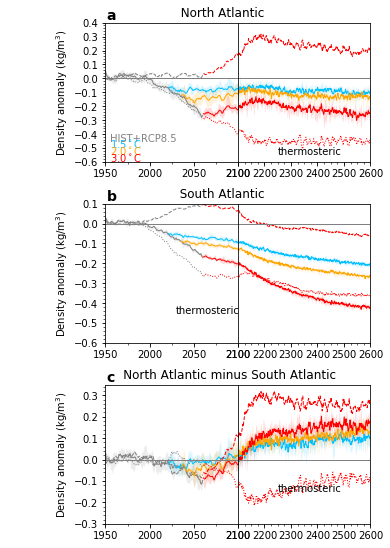

In [27]:
with_halo2=False #rhos=rhos, to test linearity

fig = plt.figure(constrained_layout=False,figsize=(8,12))
gs1 = gridspec.GridSpec(nrows=3, ncols=2, left=0.02, right=0.48,
                        wspace=0,hspace=0.3,bottom=0.3)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, 0])
ax4 = fig.add_subplot(gs1[1, 1])
ax5 = fig.add_subplot(gs1[2, 0])
ax6 = fig.add_subplot(gs1[2, 1])

rho_his_na_r=rho_his_na_r[:,0:rut.find_nearest(years_his,2060)+1]
rho_his_sa_r=rho_his_sa_r[:,0:rut.find_nearest(years_his,2060)+1]
rhot_his_na_r=rhot_his_na_r[:,0:rut.find_nearest(years_his,2060)+1]
rhot_his_sa_r=rhot_his_sa_r[:,0:rut.find_nearest(years_his,2060)+1]
rhos_his_na_r=rhos_his_na_r[:,0:rut.find_nearest(years_his,2060)+1]
rhos_his_sa_r=rhos_his_sa_r[:,0:rut.find_nearest(years_his,2060)+1]

####### a) North Atlantic    

#col1:1950-2100
ax=ax1
set_xaxis1(ax)
ax.set_ylim([-0.6, 0.4])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02)) 

plot_x(ax,years_his,rho_his_na_r,'gray',1)
plot_x2(ax,years_his,rhot_his_na_r,'gray',1,'dotted')
plot_x2(ax,years_his,rho_his_na_r-rhot_his_na_r,'gray',1,'dashed')
if with_halo2: plot_x2(ax,years_his,rhos_his_na_r,'black',1,'dashed')

plot_x(ax,years_15c,rho_15c_na_r,'deepskyblue',1)
plot_x(ax,years_20c,rho_20c_na_r,'orange',1)
plot_x(ax,years_30c,rho_30c_na_r,'red',1)
plot_x2(ax,years_30c,rhot_30c_na_r,'red',1,'dotted')
plot_x2(ax,years_30c,rho_30c_na_r-rhot_30c_na_r,'red',1,'dashed')    
if with_halo2: plot_x2(ax,years_30c,rhos_30c_na_r,'darkred',1,'dashed')

ax.set_ylabel('Density anomaly (kg/m$^3$)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
rpl.add_title(ax1,'                          North Atlantic','a')

##legend##
ax.text(1955,-0.45,'HIST+RCP8.5',color= 'gray')
ax.text(1955,-0.5,'1.5$^\circ$C',color= 'deepskyblue')
ax.text(1955,-0.55,'2.0$^\circ$C',color= 'orange')
ax.text(1955,-0.6,'3.0$^\circ$C',color= 'red')

#col2:2100-2600
ax=ax2
set_xaxis2(ax)
ax.set_ylim([-0.6, 0.4])
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)
plot_x(ax,years_his,rho_his_na_r,'gray',1)
plot_x(ax,years_15c,rho_15c_na_r,'deepskyblue',1)
plot_x(ax,years_20c,rho_20c_na_r,'orange',1)
plot_x(ax,years_30c,rho_30c_na_r,'red',1)
plot_x2(ax,years_30c,rhot_30c_na_r,'red',1,'dotted')
plot_x2(ax,years_30c,rho_30c_na_r-rhot_30c_na_r,'red',1,'dashed')
if with_halo2: plot_x2(ax,years_30c,rhos_30c_na_r,'darkred',1,'dashed')
    
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
ax.text(2250,-0.55,'thermosteric')

####### b) South Atlantic    

#col1:1950-2100
ax=ax3
set_xaxis1(ax)
ax.set_ylim([-0.6, 0.1])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02)) 

plot_x(ax,years_his,rho_his_sa_r,'gray',1)
plot_x2(ax,years_his,rhot_his_sa_r,'gray',1,'dotted')
plot_x2(ax,years_his,rho_his_sa_r-rhot_his_sa_r,'gray',1,'dashed')
if with_halo2: plot_x2(ax,years_his,rhos_his_sa_r,'gray',1,'dashed')
plot_x(ax,years_15c,rho_15c_sa_r,'deepskyblue',1)
plot_x(ax,years_20c,rho_20c_sa_r,'orange',1)
plot_x(ax,years_30c,rho_30c_sa_r,'red',1)
plot_x2(ax,years_30c,rhot_30c_sa_r,'red',1,'dotted')
plot_x2(ax,years_30c,rho_30c_sa_r-rhot_30c_sa_r,'red',1,'dashed')
if with_halo2: plot_x2(ax,years_30c,rhos_30c_sa_r,'darkred',1,'dashed')

ax.set_ylabel('Density anomaly (kg/m$^3$)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
ax.text(2030,-0.45,'thermosteric')
rpl.add_title(ax3,'                          South Atlantic','b')

#col2:2100-2600
ax=ax4
set_xaxis2(ax)
ax.set_ylim([-0.6, 0.1])
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)

plot_x(ax,years_his,rho_his_sa_r,'gray',1)
plot_x(ax,years_15c,rho_15c_sa_r,'deepskyblue',1)
plot_x(ax,years_20c,rho_20c_sa_r,'orange',1)
plot_x(ax,years_30c,rho_30c_sa_r,'red',1)
plot_x2(ax,years_30c,rhot_30c_sa_r,'red',1,'dotted')
plot_x2(ax,years_30c,rho_30c_sa_r-rhot_30c_sa_r,'red',1,'dashed')
if with_halo2: plot_x2(ax,years_30c,rhos_30c_sa_r,'darkred',1,'dashed')

ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)

####### c) North minus South Atlantic    

#col1:1950-2100
ax=ax5
set_xaxis1(ax)
ax.set_ylim([-0.3, 0.35])
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02)) 
plot_x(ax,years_his,rho_his_na_r-rho_his_sa_r,'gray',1)
plot_x2(ax,years_his,rhot_his_na_r-rhot_his_sa_r,'gray',1,'dotted')
plot_x2(ax,years_his,(rho_his_na_r-rho_his_sa_r)-(rhot_his_na_r-rhot_his_sa_r),'gray',1,'dashed')
if with_halo2: plot_x2(ax,years_his,rhos_his_na_r-rhos_his_sa_r,'black',1,'dashed')
    
plot_x(ax,years_15c,rho_15c_na_r-rho_15c_sa_r,'deepskyblue',1)
plot_x(ax,years_20c,rho_20c_na_r-rho_20c_sa_r,'orange',1)
plot_x(ax,years_30c,rho_30c_na_r-rho_30c_sa_r,'red',1)
plot_x2(ax,years_30c,rhot_30c_na_r-rhot_30c_sa_r,'red',1,'dotted')
plot_x2(ax,years_30c,(rho_30c_na_r-rho_30c_sa_r)-(rhot_30c_na_r-rhot_30c_sa_r),'red',1,'dashed')
if with_halo2: plot_x2(ax,years_30c,rhos_30c_na_r-rhos_30c_sa_r,'darkred',1,'dashed')
ax.set_ylabel('Density anomaly (kg/m$^3$)')
ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
rpl.add_title(ax5,'                              North Atlantic minus South Atlantic','c')

#col2:2100-2600
ax=ax6
set_xaxis2(ax)
ax.set_ylim([-0.3, 0.35])
ax.set_yticklabels((''))
ax.yaxis.set_tick_params(length=0,width=0)

plot_x(ax,years_15c,rho_15c_na_r-rho_15c_sa_r,'deepskyblue',1)
plot_x(ax,years_20c,rho_20c_na_r-rho_20c_sa_r,'orange',1)
plot_x(ax,years_30c,rho_30c_na_r-rho_30c_sa_r,'red',1)
plot_x2(ax,years_30c,rhot_30c_na_r-rhot_30c_sa_r,'red',1,'dotted')
plot_x2(ax,years_30c,(rho_30c_na_r-rho_30c_sa_r)-(rhot_30c_na_r-rhot_30c_sa_r),'red',1,'dashed')
if with_halo2: plot_x2(ax,years_30c,rhos_30c_na_r-rhos_30c_sa_r,'darkred',1,'dashed')

ax.axhline(y=0.0,color="gray",linestyle='-',linewidth=1)
ax.text(2250,-0.15,'thermosteric')


if with_halo2: rpl.mysavefig(fig,'PLOTS/rho0_atlantic_top800_ts_withhalo2.png')
else: rpl.mysavefig(fig,'PLOTS/rho0_atlantic_top800_ts.png')

## Description plot
The AMOC, in equilibrium, is proportional to Density gradient between the North and South Atlantic. During the transient warming phase (gray line), this does not hold, as the density gradient is fairly stable (gray line, panel C). The declining AMOC is due to local North Atlantic decrease in density (gray line, panel A), which is mainly due to thermal changes (gray dotted line, panel A). After emission cessation, the meridional density gradient increases, which is consistent with the AMOC recovery. The density increase is due to changes in salt, as the thermosteric component remains stable

